In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns #data visualization
import warnings as wr
wr.filterwarnings("ignore") #to ignore the warnings

In [6]:
#Reading the csv file heart.csv in variable 
df=pd.read_csv("heart.csv")

In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
print('Number of rows are :-',df.shape[0], ',and number of columns are :-',df.shape[1])

Number of rows are :- 303 ,and number of columns are :- 14


# Observation:
#here we get exact number of rows and columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Observation:

#1)you can see that there are no missing rows in the entire dataset. so we do not need to fil/drop any value
#2)All the columns except oldpeak (float) are of int data type.

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# Observation:
#There are no missing values

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

# Observation:
#here we get all column names 

In [13]:
#counting duplicate 
df.duplicated().sum()

1

# Observation:
#There is 1 duplicate row. Let's drop it!

In [14]:
df.drop_duplicates(inplace=True)
print('Number of rows are :',df.shape[0], ',and number of columns are :',df.shape[1])

Number of rows are : 302 ,and number of columns are : 14


# Observation:
#Now we have 302 rows and 14 columns

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


# Observation:

#The average blood pressure of an individual is 130 whereas the maximun value goes upto 200.
#The average heart rate of the group is 152, whereas overall it ranges between 133 to 202
#Age of the group varies from 29 to 77 and the mean age is 55.5

In [16]:
#This is to look at what all unique values have . Just trying to use python
list_col=['sex','chol','trtbps','cp','thall','exng']

for col in list_col: 
    print('{} :{} ' . format(col.upper(),df[col].unique()))

SEX :[1 0] 
CHOL :[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131] 
TRTBPS :[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164] 
CP :[3 2 1 0] 
THALL :[1 2 3 0] 
EXNG :[0 1] 


# Observation:

#There are two sex : 0 and 1
#The highest cholestrol level is 564 and the lowest is 126.
#Resting Blood Pressure of individuals vary between 94 to 200.
#There are 4 types of chest pain.
#exercise induced angina has 2 types (1 = yes; 0 = no)

# EDA

Number of people having sex as 0 are 96 and Number of people having sex as 1 are 206


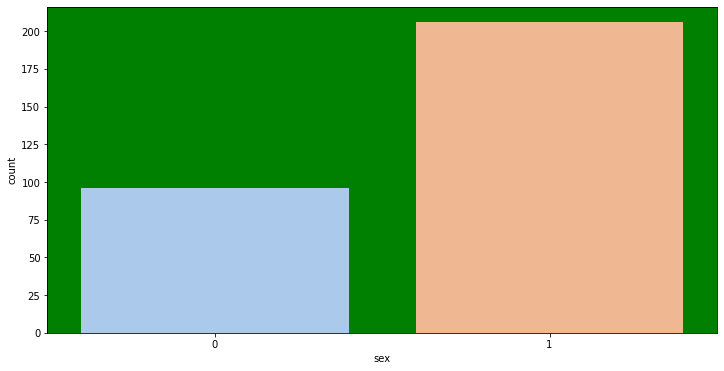

In [17]:
print(f'Number of people having sex as 0 are {df.sex.value_counts()[0]} and Number of people having sex as 1 are {df.sex.value_counts()[1]}')
plt.figure(figsize=(12,6))
ax=plt.axes()
ax.set_facecolor("green")
p = sns.countplot(data=df, x="sex", palette='pastel')

# Observation:

#The number of people belonging to sex category 0 are 96 whereas 1 are 206.
#The number of people in one category are more than double than the zero.

<AxesSubplot:xlabel='cp', ylabel='count'>

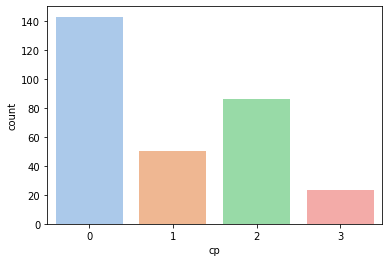

In [ ]:
sns.countplot(x='cp', data=df, palette='pastel')

# Observation:

cp : Chest Pain type chest pain type

Value 0: typical angina
Value 1: atypical angina
Value 2: non-anginal pain
Value 3: asymptomatic
People of chest pain category '0' have the highest count, whereas of count of chest pain '3' is the lowest

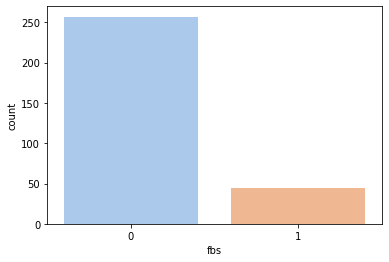

In [18]:
sns.countplot(x='fbs', data=df, palette='pastel')

# Observation:
People of fbs category 1 are less than 25% of people of fbs category 0

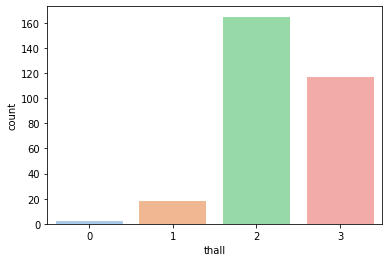

In [19]:
sns.countplot(x='thall', data=df, palette='pastel')

# Observation:
#Thall count is maximum for type 2 ( 165 ) and min for type 0 ( 2 ) .

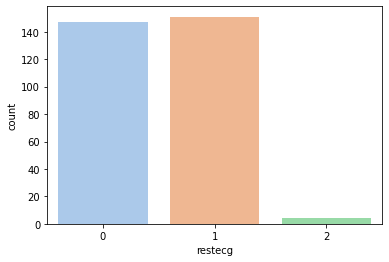

In [20]:
sns.countplot(x='restecg', data=df, palette='pastel')


# Observation:

#ECG count is almost the same for type 0 and 1.
#Also, its almost negligible for type 2 in comparision to type 0 and 1.

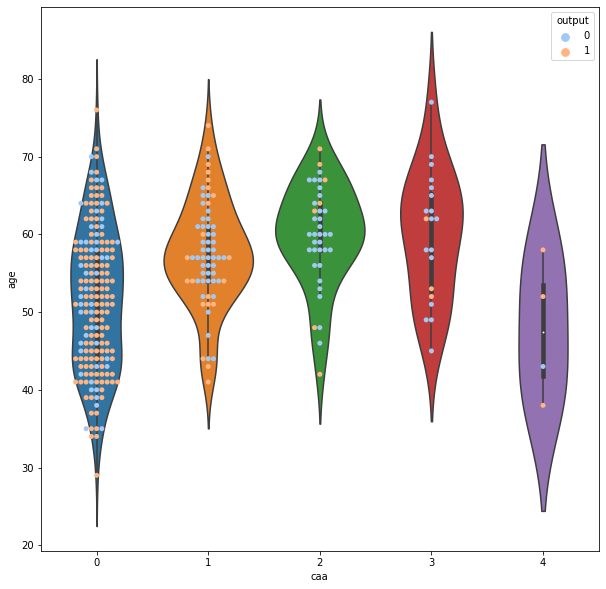

In [21]:
plt.figure(figsize = (10,10))
sns.violinplot(x='caa',y='age',data=df)
sns.swarmplot(x=df['caa'],y=df['age'],hue=df['output'], palette='pastel')

In [22]:
'''Observation:

#This swarmplot gives us a lot of information.
#Accoring to the figure, people belonging to caa category '0' , irrespective of their age are highly prone to getting a heart attack.
#While there are very few people belonging to caa category '4' , but it seems that around 75% of those get heart attacks.
#People belonging to category '1' , '2' and '3' are more or less at similar risk.'''

"Observation:\n\n#This swarmplot gives us a lot of information.\n#Accoring to the figure, people belonging to caa category '0' , irrespective of their age are highly prone to getting a heart attack.\n#While there are very few people belonging to caa category '4' , but it seems that around 75% of those get heart attacks.\n#People belonging to category '1' , '2' and '3' are more or less at similar risk."

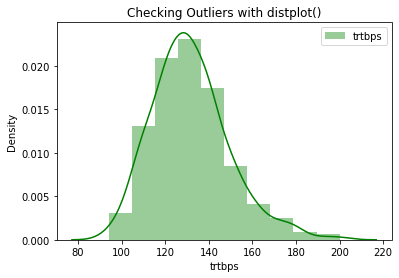

In [23]:
sns.color_palette("pastel")
plt.title('Checking Outliers with distplot()')
sns.distplot(df.trtbps, label='trtbps', kde=True, bins=10, color='green')
plt.legend()

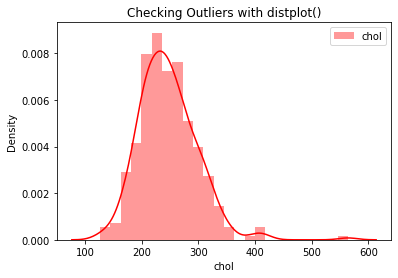

In [24]:
plt.title('Checking Outliers with distplot()')
sns.distplot(df.chol, label='chol', kde=True, color='red')
plt.legend()

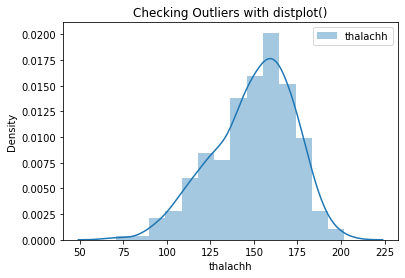

In [25]:
plt.title('Checking Outliers with distplot()')
sns.distplot(df['thalachh'],label='thalachh', kde=True )
plt.legend()

In [26]:
'''Observations:

#trtbps and chol looks like they are normally distributed, with some outliers highly skewed towards right.
#In case of thalachh the data is highly skewed towards right!'''

'Observations:\n\n#trtbps and chol looks like they are normally distributed, with some outliers highly skewed towards right.\n#In case of thalachh the data is highly skewed towards right!'

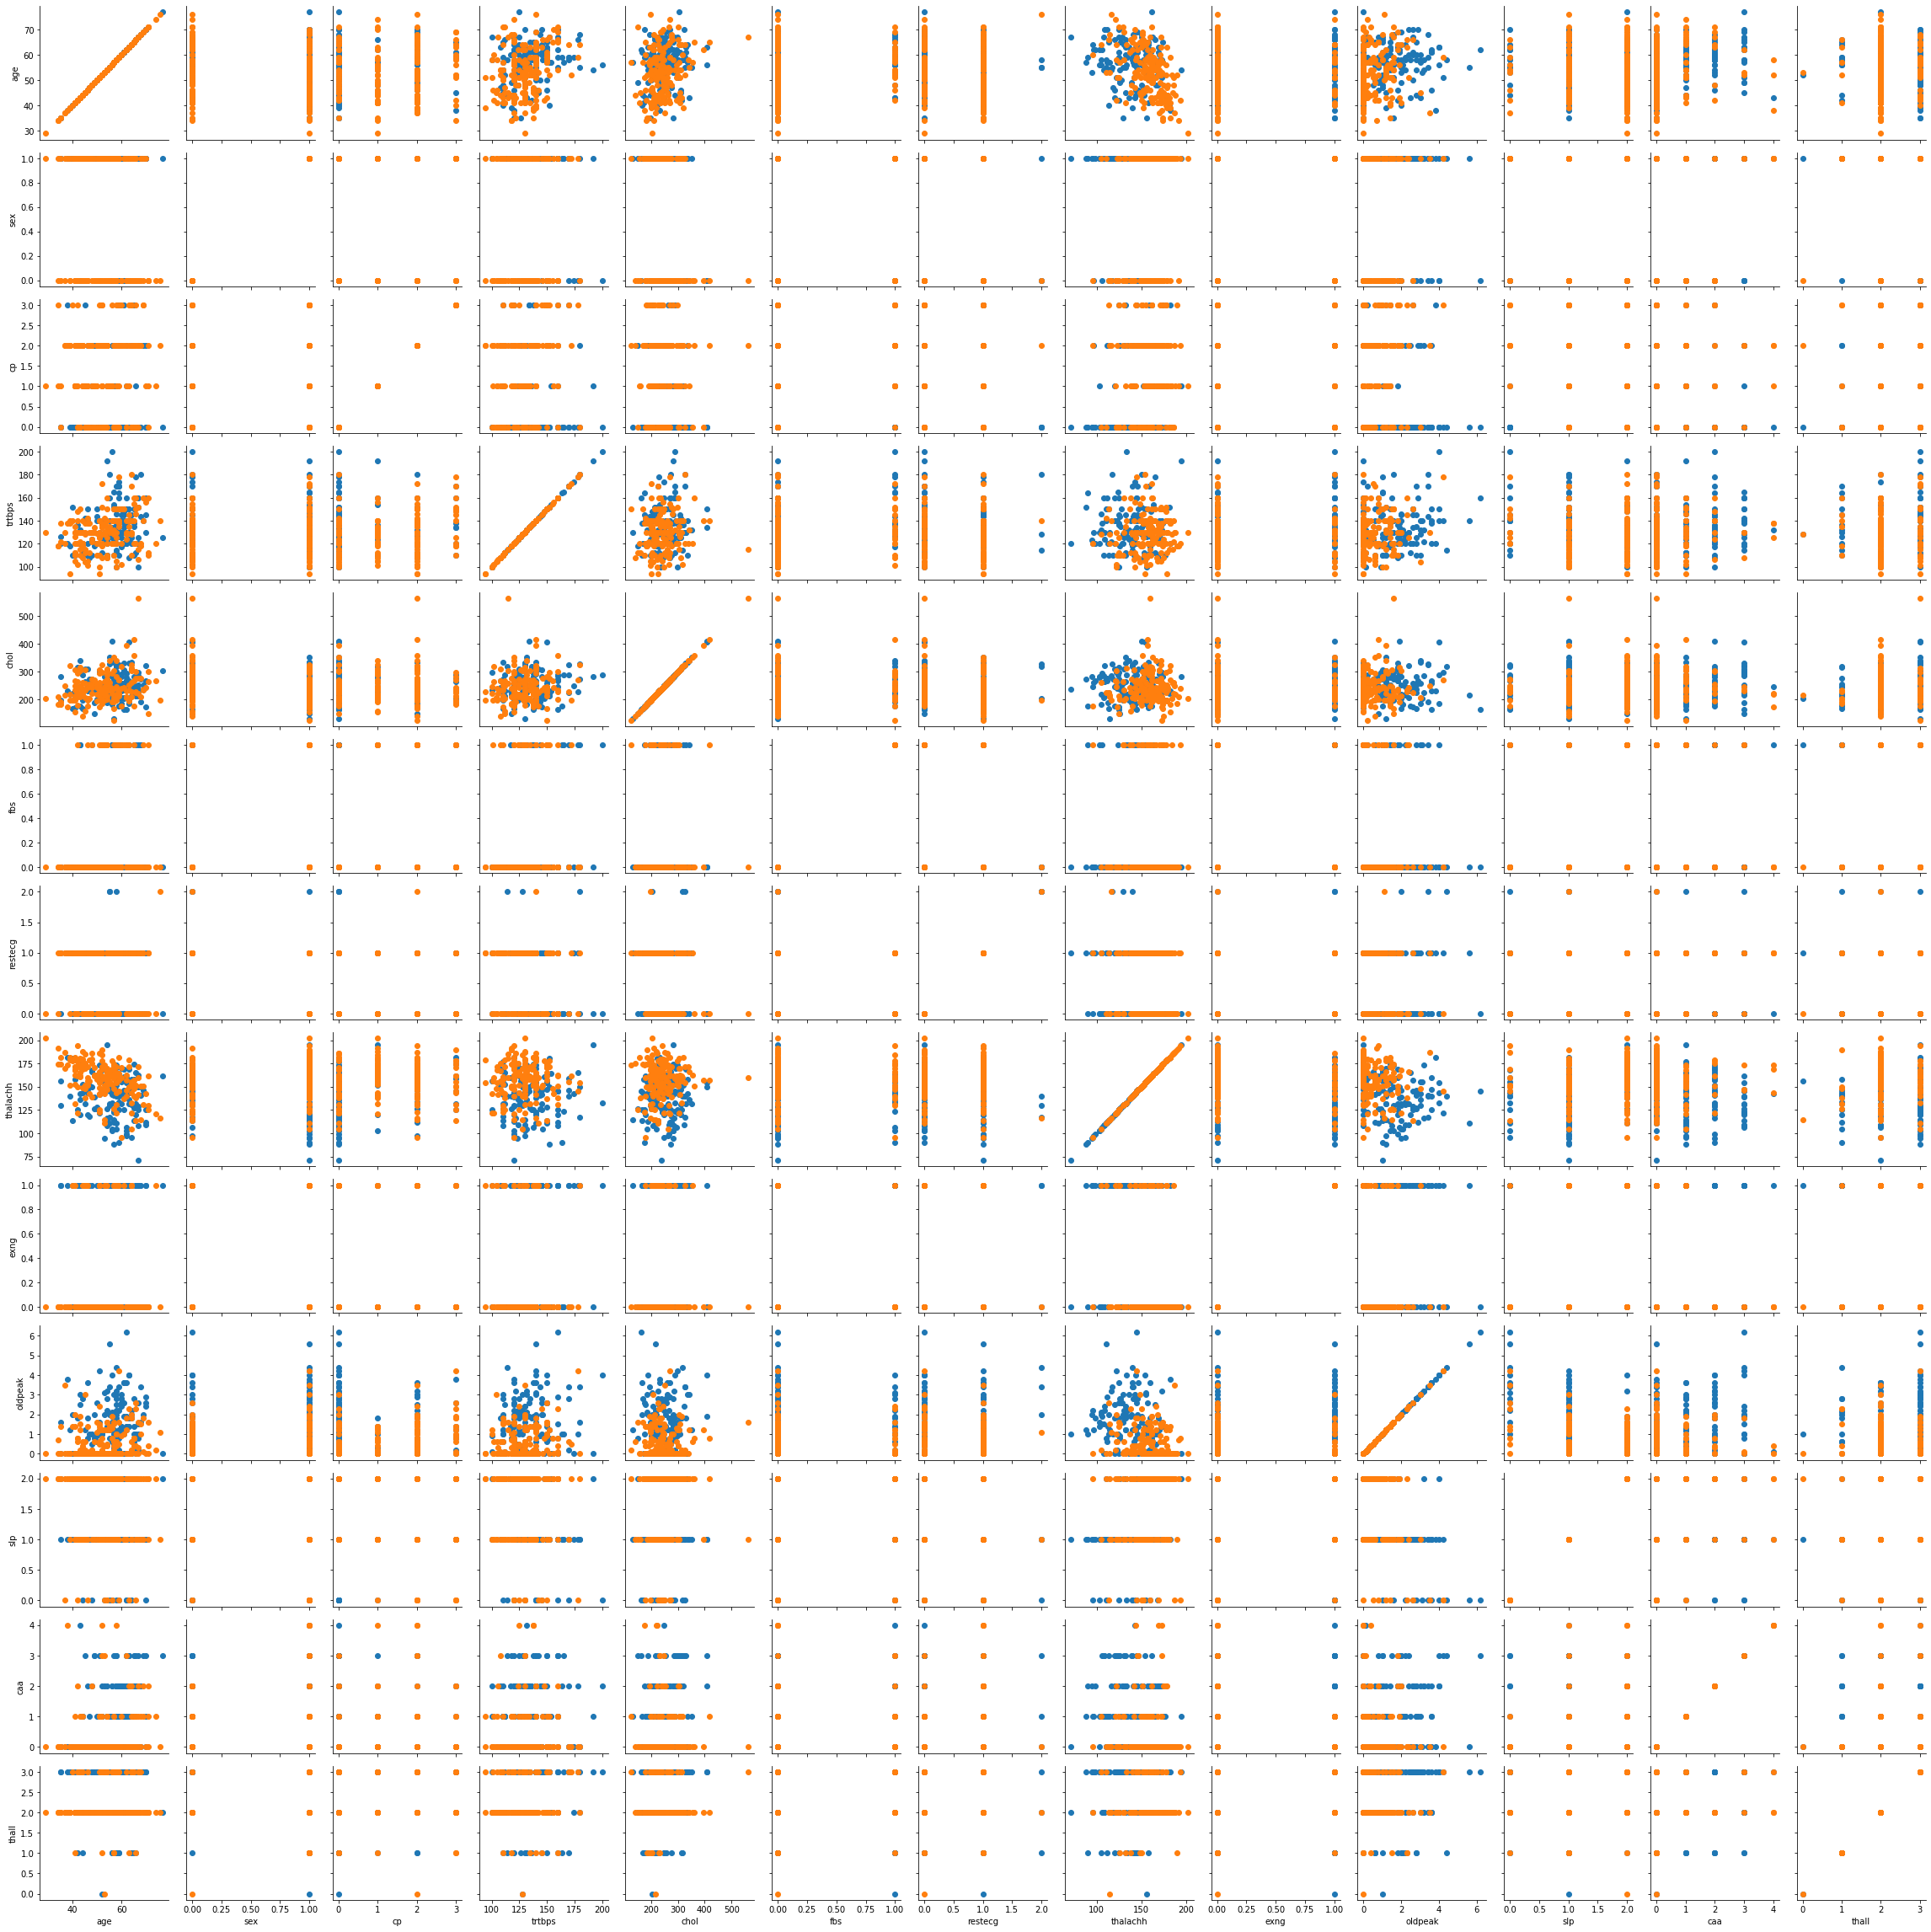

In [27]:
df_p=sns.PairGrid(df,hue="output")
df_p.map(plt.scatter)

# By the pair plot we can see data destribution and identfy outlier

In [28]:
#spliting data into X and y

X=df.drop(["output"],axis=1)
y=df["output"]

In [29]:
#using minmax Scaler for scaling the data in same Scale
#we scal the aal data between 0 to 1

In [30]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
X[X.columns] = scalerX.fit_transform(X[X.columns])

# model building


In [31]:
#for model building
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [32]:
# Spliting the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [39]:
model = DecisionTreeClassifier()

In [40]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.66      0.73      0.69        26
           1       0.78      0.71      0.75        35

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61



In [47]:
model_knn = KNeighborsClassifier()
model_logistic = LogisticRegression()

In [49]:
model_logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
print(classification_report(y_test,model_logistic.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        26
           1       0.89      0.91      0.90        35

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [64]:
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [65]:
print(classification_report(y_test,model_knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        26
           1       0.94      0.91      0.93        35

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

